#### Importing Libraries and Dataset

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
consumption_df

,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,123762,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,123763,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,123764,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


In [2]:
if 'Unnamed: 0' in consumption_df.columns:
    consumption_df.drop('Unnamed: 0',axis=1, inplace = True)

In [3]:
consumption_df

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
611013,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


#### Converting Dataset to House-wise dictionary

In [4]:
house_wise_consumption = dict()
for house_number in consumption_df['House Number'].unique():
    house_data = consumption_df[consumption_df['House Number'] == house_number]
    house_wise_consumption[house_number] = house_data.copy()
house_wise_consumption[1]
# house_wise_consumption[14]['timestamp'].iloc[0]
# house_wise_consumption[14]['timestamp'].iloc[-1]
# house_wise_consumption[14]['House Number'].iloc[0]

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
29226,2015-10-02 20:00:00,2.101,1,0.011621,0.019273,0.026968,0.276137,0.000851
29227,2015-10-02 21:00:00,1.646,1,0.010396,0.019291,0.023322,0.217043,0.000675
29228,2015-10-02 22:00:00,1.319,1,0.009516,0.019304,0.020701,0.174573,0.000549
29229,2015-10-02 23:00:00,1.473,1,0.009930,0.019298,0.021935,0.194574,0.000609


#### Comparing Timestamps for clustering

In [5]:
timestamp_comparison = list()
for house in house_wise_consumption:
    first_timestamp = house_wise_consumption[house]['timestamp'].iloc[0]
    last_timestamp = house_wise_consumption[house]['timestamp'].iloc[-1]
    timestamp_comparison.append([house, first_timestamp, last_timestamp])
timestamp_comparison
timestamp_comparison_df = pd.DataFrame(timestamp_comparison, columns = ['House', 'First Timestamp', 'Last Timestamp'])
timestamp_comparison_df

,House,First Timestamp,Last Timestamp
0,1,2012-06-01 01:00:00,2015-10-03 00:00:00
1,2,2016-06-09 00:00:00,2019-11-20 23:00:00
2,3,2015-01-27 00:00:00,2018-01-29 23:00:00
3,4,2015-01-30 00:00:00,2018-01-29 23:00:00
4,5,2015-01-30 00:00:00,2018-01-29 23:00:00
5,6,2015-01-30 00:00:00,2018-01-29 23:00:00
6,7,2015-05-30 00:00:00,2018-01-29 23:00:00
7,8,2015-02-21 00:00:00,2018-02-20 23:00:00
8,9,2015-05-01 00:00:00,2018-02-21 23:00:00
9,10,2015-02-21 00:00:00,2018-02-20 23:00:00


In [6]:
# houses_with_ts = []
# sample_timestamp = '2017-11-01 00:00:00'
# for house in house_wise_consumption:
#     if sample_timestamp in house_wise_consumption[house]['timestamp'].unique():
#         houses_with_ts.append(house)
# len(houses_with_ts)
#house_wise_consumption[8][house_wise_consumption[8]['timestamp'] >= '2017-11-17'].head(60)

#### Creating a December consumption dictionary of dataframes

In [7]:
december_consumption = dict()
for house in house_wise_consumption:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= '2017-11-25') & (house_wise_consumption[house]['timestamp'] >= '2017-11-01')]
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)
def calculate_rows():
    december_rows = []
    for house in december_consumption:
        december_rows.append([house, len(december_consumption[house])])
    december_rows
    december_rows_df = pd.DataFrame(december_rows, columns = ['House', 'Rows'])
    return december_rows_df
def calculate_incomplete_rows():
    december_rows_df = calculate_rows()
    december_rows_incomplete_df = december_rows_df[(december_rows_df['Rows'] > 0) & (december_rows_df['Rows'] < 576)]
    return december_rows_incomplete_df
def fill_na_december_consumption(complete_df, incomplete_df):
    complete_df = complete_df.copy()
    year_incomplete = pd.Timestamp(incomplete_df.iloc[0]['timestamp']).year
    year_complete = pd.Timestamp(complete_df.iloc[0]['timestamp']).year
    complete_df['timestamp'] = complete_df['timestamp'].str.replace(str(year_complete), str(year_incomplete))
    fill_missing_values = complete_df[~complete_df.timestamp.isin(incomplete_df.timestamp)].copy()
    #print(fill_missing_values)
    fill_columns = ['energy_kWh', 'electronics workbench energy', 'network equipment energy', 'home office energy', 'RAE home office energy','RAE Mobile Phone Charger Energy']
    for fill_column in fill_columns:
        fill_missing_values[fill_column] = incomplete_df[fill_column].mean()
    incomplete_df = pd.concat([incomplete_df, fill_missing_values])
    incomplete_df = incomplete_df.sort_values(by=['timestamp'])
    return incomplete_df
def calculate_missing_december_rows():
    december_rows_df = calculate_rows()
    december_rows_missing_df = december_rows_df[(december_rows_df['Rows'] == 0)]
    return december_rows_missing_df
calculate_rows()

,House,Rows
0,1,0
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,448
8,9,576
9,10,576


In [8]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

##### Houses with no December-17 consumption values

In [9]:
timestamp_comparison_df.set_index('House').join(calculate_missing_december_rows().set_index('House'), how='inner')

,First Timestamp,Last Timestamp,Rows
House,,,
1,2012-06-01 01:00:00,2015-10-03 00:00:00,0
17,2016-06-01 00:00:00,2017-04-29 23:00:00,0
26,2019-11-29 00:00:00,2020-05-20 23:00:00,0
27,2019-03-06 00:00:00,2020-05-20 23:00:00,0
28,2018-08-01 00:00:00,2020-05-19 23:00:00,0


In [10]:
missing_december_houses_dates = {
    1: ['2014-11-25', '2014-11-01'],
    17: ['2016-11-25', '2016-11-01'],
    26: ['2019-11-25', '2019-11-01'],
    27: ['2019-11-25', '2019-11-01'],
    28: ['2019-11-25', '2019-11-01'],
}

In [11]:
for house in missing_december_houses_dates:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= missing_december_houses_dates[house][0]) & (house_wise_consumption[house]['timestamp'] >= missing_december_houses_dates[house][1])]
    #print((house, missing_december_houses_dates[house][0]))
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)

##### Filling missing values for December consumption

In [12]:
calculate_incomplete_rows()

,House,Rows
16,17,574
26,27,571
27,28,572


In [13]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

In [14]:
#calculate_rows()

#### Houses to be clustered

In [15]:
##print('Houses to be clustered: ')
clustered_df = calculate_rows()[calculate_rows()['Rows'] ==  576]
clustered_df

,House,Rows
0,1,576
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,576
8,9,576
9,10,576


#### Converting to clustering matrix

In [16]:
clustering_matrix = []
for house in calculate_rows()[calculate_rows()['Rows'] ==  576]['House']:
    clustering_matrix.append(np.array(december_consumption[house]['energy_kWh']).reshape(-1,1))
clustering_matrix = np.array(clustering_matrix)
clustering_matrix.shape

(27, 576, 1)

#### Time series clustering of all households except house 26

In [17]:
km_sdtw = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=5,
                            max_iter_barycenter=5,
                            metric_params={"gamma": .5},
                            random_state=0).fit_predict(clustering_matrix)

In [18]:
len(km_sdtw)

27

In [19]:
clustered_df['Cluster'] = km_sdtw

In [20]:
clustered_df

,House,Rows,Cluster
0,1,576,0
1,2,576,2
2,3,576,3
3,4,576,0
4,5,576,3
5,6,576,2
6,7,576,2
7,8,576,2
8,9,576,2
9,10,576,2


#### Time-series LSTM-based predictive modeling

In [21]:
n_past = 14
n_future = 1

In [42]:
class House:
    cols = ['energy_kWh', 'electronics workbench energy', 'network equipment energy',
            'home office energy', 'RAE home office energy', 'RAE Mobile Phone Charger Energy']
    def __init__(self, house):
        self.house = house
        self.consumption_df = house_wise_consumption[house].copy()[House.cols].astype(float)
        self.train_dates_df = house_wise_consumption[house]['timestamp']
        self.prepare_dataset(n_future, n_past)
    
    def __repr__(self):
        return str(self.house)
    
    def prepare_dataset(self, n_future = 1, n_past = 14):
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []
        consumption_np = np.array(self.consumption_df)
        #Reformat input data into a shape: (n_samples x timesteps x n_features)
        #In my example, my self.consumption_df has a shape (12823, 5)
        #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
        for i in range(n_past, len(consumption_np) - n_future +1):
            trainX.append(consumption_np[i - n_past:i, 0:self.consumption_df.shape[1]])
            trainY.append(consumption_np[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        #print('trainX shape == {}.'.format(trainX.shape))
        #print('trainY shape == {}.'.format(trainY.shape))
        self.trainX = trainX
        self.trainY = trainY

class Cluster: 
    def __init__(self, houses):
        self.houses = [House(house) for house in houses]
        self.trainX_list = (list(map(lambda x: x.trainX, self.houses)))
        self.trainY_list = (list(map(lambda x: x.trainY, self.houses)))
        self.train_dates_list = (list(map(lambda x: x.train_dates_df, self.houses)))
        self.consumption_df_list = (list(map(lambda x: x.consumption_df, self.houses)))
        self.prepare_dataset()
        
    
    def prepare_dataset(self):
        
        self.train_dates = np.concatenate(self.train_dates_list, axis=0)
        ## TODO - Replace concatenate with for loop or sort by time
        self.X = np.concatenate(self.trainX_list, axis=0)
        self.Y = np.concatenate(self.trainY_list, axis=0)
    
    def prepare_model(self):
        model = Sequential()
        model.add(LSTM(16, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(8, activation='relu', return_sequences=False))
        model.add(Dropout(0.4))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=["mape", "mse", tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
        model.summary()
        return model
    
    def train_model(self):
        model = self.prepare_model()
        history = model.fit(self.X, self.Y, epochs=5, batch_size=16, validation_split=0.1, verbose=1)
        self.history = history
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Testing loss')
        
        plt.legend()
        return model
    
    def predicted(self):
        model = self.train_model()
        predictions = list(map(lambda x: pd.Series(model.predict(x).reshape(1,-1)[0]), self.trainX_list))
        #return pd.Series(model.predict(self.X).reshape(1,-1)[0])
        return dict(zip(self.houses, predictions))
    
    def results(self):
        predicted = self.predicted()
        house_prediction_list_df  = {}
        for house in predicted:
            house_prediction_df = house.consumption_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['timestamp'] = house.train_dates_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['energy_predicted'] = predicted[house]
            house_prediction_list_df[house.house] = house_prediction_df
        return house_prediction_list_df

In [ ]:
zero_houses = list(clustered_df[clustered_df['Cluster'] == 0]['House'])
zero_cluster = Cluster(zero_houses)
zero_cluster_results = zero_cluster.results()
print('Training History for Cluster 0:')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 16)            1472      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
9875/9875 [==============================] - 80s 8ms/step - loss: 0.6627 - mape: 318275.2188 - mse: 0.6627 - root_mean_squared_error: 0.8141 - val_loss: 0.5887 - val_mape: 31

In [ ]:
zero_cluster.history.history['mape']
zero_cluster.history.history['mse']

In [24]:
# one_houses = list(clustered_df[clustered_df['Cluster'] == 1]['House'])
# one_cluster = Cluster(one_houses)
# one_cluster_results = one_cluster.results()
# print('Training History for Cluster 1:')

In [25]:
# two_houses = list(clustered_df[clustered_df['Cluster'] == 2]['House'])
# two_cluster = Cluster(two_houses)
# two_cluster_results = two_cluster.results()
# print('Training History for Cluster 2:')

In [26]:
# three_houses = list(clustered_df[clustered_df['Cluster'] == 3]['House'])
# three_cluster = Cluster(three_houses)
# three_cluster_results = three_cluster.results()
# print('Training History for Cluster 3:')

#### Without clustering

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 10)            680       
                                                                 
 lstm_3 (LSTM)               (None, 4)                 240       
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________
34115/34115 [==============================] - 281s 8ms/step - loss: 0.4874 - val_loss: 0.4146
Training History without clustering:


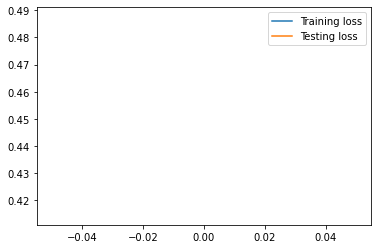

In [27]:
all_houses = list(clustered_df['House'])
all_cluster = Cluster(all_houses)
all_cluster_results = all_cluster.results()
print('Training History without clustering:')

#### Predictions from Cluster Specific Models and Model Trained Without Clustering

In [93]:
def x_axis_label_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    label = pd.Timestamp(label)
    month = label.month_name()[:3]
    #if month == 'Jan':
    month += f'\n{label.year}'
    return month

def graph_predictions(cluster_specific_results, all_results):
    df1 = cluster_specific_results[1][['timestamp','energy_predicted', 'energy_kWh']].set_index('timestamp')
    df1['energy_predicted_without_clustering']= np.array(all_results[1][['energy_predicted']])
    df1.rename({'energy_predicted':'energy_predicted_with_clustering', 'energy_kWh':'real_energy'},axis = 1, inplace = True)
    ax = df1[::300].plot.line(figsize=(20,10))
    ax.set_xticklabels(map(x_axis_label_format, df1[::int(len(df1)/8)+1].index))

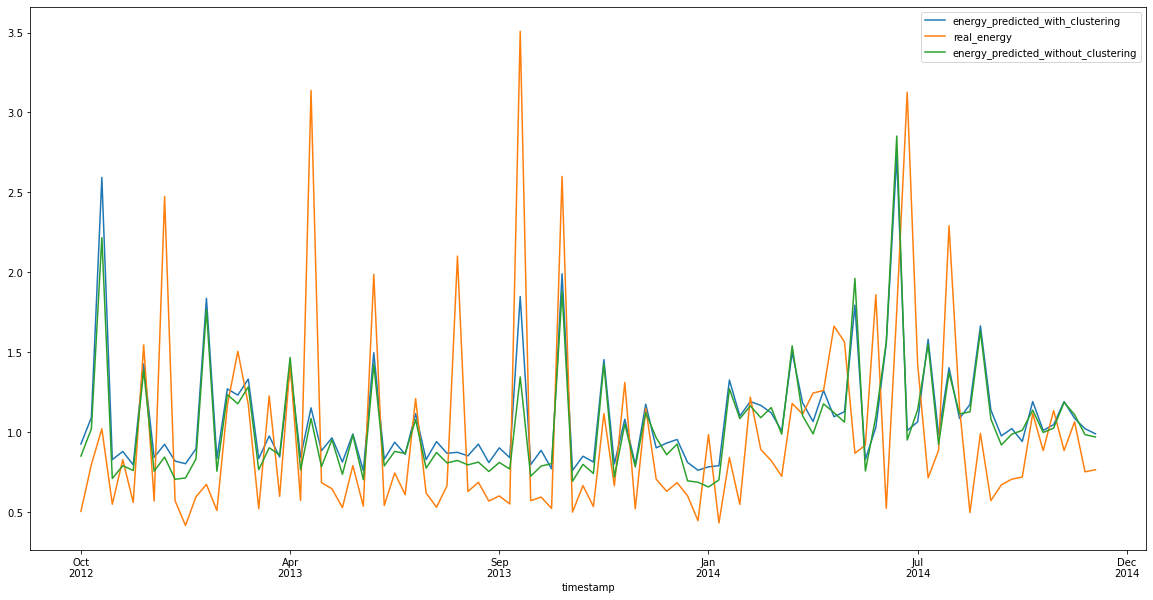

In [94]:
graph_predictions(zero_cluster_results, all_cluster_results)
#df1 = zero_cluster_results[1][['timestamp','energy_predicted', 'energy_kWh']].set_index('timestamp')
#df1['energy_predicted_without_clustering']= np.array(all_cluster_results[1][['energy_predicted']])